## 作業
1. 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
2. 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
3. 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

# [作業目標]
- 試著設定隨機資料, 並依照範例練習基礎與進階的 Heatmap

# [作業重點]
- 如題1.條件隨機矩陣, 並仿造基礎 Heatmap 範例作圖   
(In[2], OUT[2]) (Hint : numpy.random.random - 均勻分布, 隨機小數)
- 如題2.3.條件隨機數值列, 並仿造進階 Heatmap 範例作圖  
(In[3], OUT[3], In[4], OUT[4]) (Hint : numpy.random.randn - 常態分布)

In [15]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

[[-0.4687387   0.37570206  0.06572265 -0.8164904   0.76402486  0.81550391
  -0.92056312 -0.25465148 -0.72467619 -0.08571997]
 [-0.52338379 -0.35198545  0.40404662 -0.51465899 -0.55348198  0.89759139
   0.27663219  0.50368535  0.41065641  0.38321877]
 [ 0.28091633 -0.80690591 -0.41218083  0.50844241  0.52800058  0.55816813
   0.12711804  0.39202655  0.41447348 -0.56302823]
 [-0.39400068 -0.97956959  0.71703444  0.04582371 -0.98428773  0.31939332
   0.1853371  -0.78506417  0.78880053  0.59602559]
 [-0.33716199 -0.71322377  0.49971022 -0.31983437 -0.43713482 -0.22016046
   0.29991838  0.69772861 -0.82758765  0.0754273 ]
 [ 0.25621685 -0.87453501 -0.18325792 -0.64415708 -0.20735625 -0.22285414
  -0.79158998 -0.12905323 -0.28541125 -0.69666506]
 [-0.10176863  0.26995807 -0.46883132 -0.76696636 -0.30589369  0.63131565
  -0.09969772 -0.43624547  0.04050282 -0.36902381]
 [-0.30754729 -0.9174957   0.07992199 -0.39550374 -0.93087321 -0.57946608
   0.02409186  0.4053052  -0.5965935  -0.32756823]


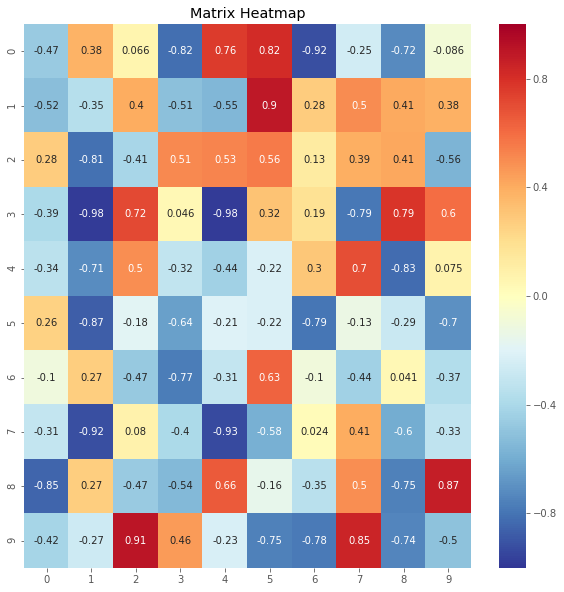

In [16]:

matrix =2 * np.random.random_sample((10, 10)) - 1
print(matrix)
plt.figure(figsize=(10,10))


sns.heatmap(matrix, cmap = plt.cm.RdYlBu_r, vmin = -1, annot = True, vmax = 1)
plt.title('Matrix Heatmap');
plt.show()

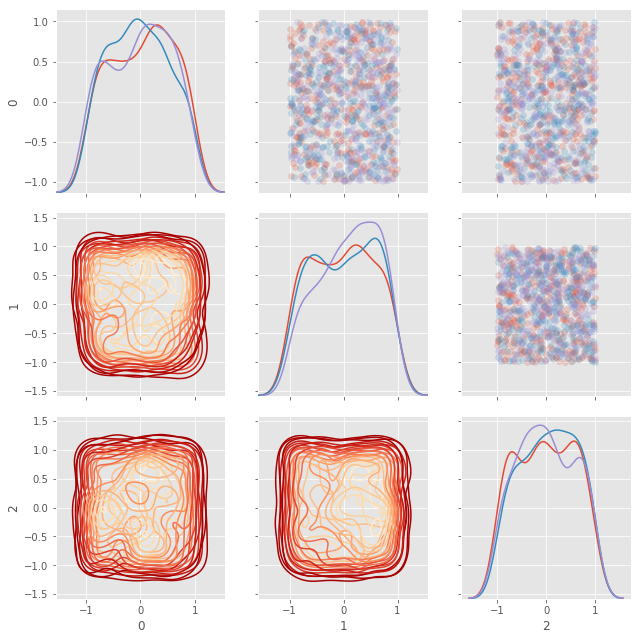

In [26]:
nrow = 1000
ncol = 3

matrix =2 * np.random.random_sample((nrow, ncol)) - 1

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])

grid.map_upper(plt.scatter , alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot , cmap = plt.cm.OrRd_r)

plt.show()

[[-0.66711804 -0.04037468  0.2164332 ]
 [ 0.02760348  0.19516877  0.3357013 ]
 [-0.01763847 -0.39641076  0.4637586 ]
 ...
 [-0.03950857  0.3643112   0.75131397]
 [-0.5908827   0.09783033  0.0267292 ]
 [ 0.02530624 -0.09983013  0.33278226]]
   index         0         1         2
0      2 -0.667118 -0.040375  0.216433
1      2  0.027603  0.195169  0.335701
2      1 -0.017638 -0.396411  0.463759
3      2 -0.063948 -0.237929  0.267084
4      0  0.126673  0.383988  0.402597


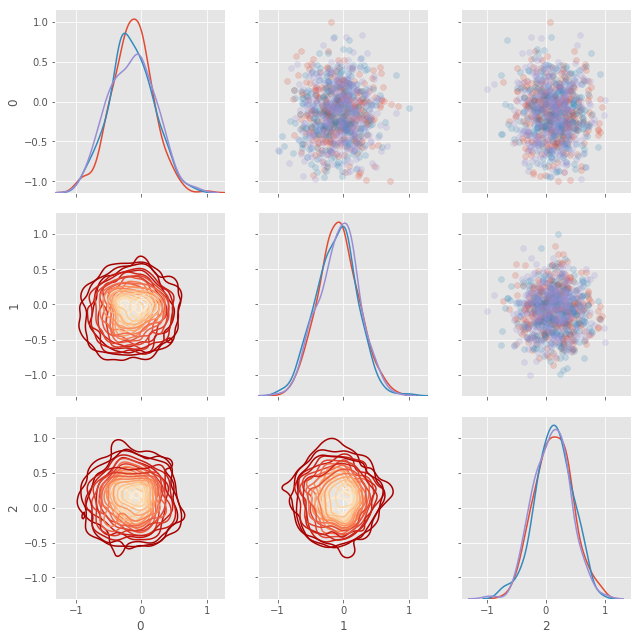

In [23]:
nrow = 1000
ncol = 3

matrix =np.random.randn(nrow,ncol)

#資料最小最大化

Min_Max_Scaler = MinMaxScaler( feature_range=(-1,1) ) # 設定縮放的區間上下限
MinMax_Data = Min_Max_Scaler.fit_transform(matrix) # Data 為原始資料
print(MinMax_Data)
# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(MinMax_Data, indice).reset_index()
print(plot_data.head())
# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False, 
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])

grid.map_upper(plt.scatter , alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot , cmap = plt.cm.OrRd_r)

plt.show()